### NAMA : Bimasakti Cahyo Utomo
### NIM  : 2209106021
## POSTTEST 7

# Data Preparation

### Collab

In [ ]:
# !pip install opendatasets

In [ ]:
# import opendatasets as od

In [ ]:
# od.download("https://www.kaggle.com/datasets/balabaskar/wonders-of-the-world-image-classification")

In [ ]:
# !pip install split-folders

In [1]:
import splitfolders

### Mebagi dataset menjadi train, test dan val ke dalam folder bernama "dataset_final"

In [2]:
splitfolders.ratio("Wonders of World",
                    output="dataset_final",
                    seed=1337,
                    ratio=(.8,.1,.1))

### Import ImageDataGenerator

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-11-06 12:54:27.803123: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-06 12:54:27.803177: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-06 12:54:27.803194: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-06 12:54:27.809372: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/lib/python3/dist-packages/scipy/__init__.py:1

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    brightness_range=[0.9, 1.1],
    vertical_flip=True,
    horizontal_flip=True,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2
)

val_datagen = ImageDataGenerator(
    rescale=1/255
)

# Membuat Arsitektur CNN

In [5]:
train_generator = train_datagen.flow_from_directory(
    'dataset_final/train',
    target_size=(150,150), 
    batch_size=128,
    class_mode = 'categorical',
)

val_generator = val_datagen.flow_from_directory(
    'dataset_final/val', 
    target_size=(150,150), 
    batch_size=128, 
    class_mode = 'categorical',
)

Found 3072 images belonging to 12 classes.
Found 381 images belonging to 12 classes.


### Import Library Untuk Melatih Model

In [6]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [7]:
model = Sequential([
    # 1. feature extraction layer
    Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    # 2. fully connected layer,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(12, activation='softmax'),
])

model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


2023-11-06 12:54:29.837157: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-06 12:54:29.840923: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-06 12:54:29.840980: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-06 12:54:29.842096: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-06 12:54:29.842136: I tensorflow/compile

### Callback

In [8]:
from keras.callbacks import EarlyStopping

# Training

In [9]:
monitor_callback = EarlyStopping(monitor='val_accuracy', patience=10)

history = model.fit(train_generator, epochs=100,
            validation_data=val_generator,
            verbose=1,
            callbacks = [monitor_callback])

Epoch 1/100


2023-11-06 12:54:32.700900: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-06 12:54:32.942055: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-06 12:54:33.773465: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-06 12:54:33.842235: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7eff20045170 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-06 12:54:33.842289: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-11-06 12:54:33.848335: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-06 12:54:33.928034: I ./tensorflow/compiler/jit/

24/24 [==============================] - 21s 658ms/step - loss: 2.4679 - accuracy: 0.1195 - val_loss: 2.4202 - val_accuracy: 0.1076
Epoch 2/100
24/24 [==============================] - 16s 660ms/step - loss: 2.3135 - accuracy: 0.1963 - val_loss: 2.4120 - val_accuracy: 0.2178
Epoch 3/100
24/24 [==============================] - 16s 654ms/step - loss: 2.1280 - accuracy: 0.2699 - val_loss: 1.9494 - val_accuracy: 0.3675
Epoch 4/100
24/24 [==============================] - 16s 666ms/step - loss: 1.9634 - accuracy: 0.3324 - val_loss: 1.9475 - val_accuracy: 0.3622
Epoch 5/100
24/24 [==============================] - 16s 656ms/step - loss: 1.8522 - accuracy: 0.3730 - val_loss: 1.8375 - val_accuracy: 0.4304
Epoch 6/100
24/24 [==============================] - 16s 659ms/step - loss: 1.7614 - accuracy: 0.4118 - val_loss: 1.7837 - val_accuracy: 0.4541
Epoch 7/100
24/24 [==============================] - 16s 675ms/step - loss: 1.7100 - accuracy: 0.4284 - val_loss: 1.6347 - val_accuracy: 0.4987
Epoc

In [10]:
model.evaluate(val_generator)

3/3 [==============================] - 1s 274ms/step - loss: 0.8002 - accuracy: 0.7717


[0.8001737594604492, 0.7716535329818726]

In [11]:
test_datagen = ImageDataGenerator(
    rescale=1/255.0
)

test_generator = test_datagen.flow_from_directory(
    'dataset_final/test',
    target_size = (150,150),
    batch_size=64,
    class_mode='categorical',
)

Found 393 images belonging to 12 classes.


### Grafik

In [12]:
import matplotlib.pyplot as plt

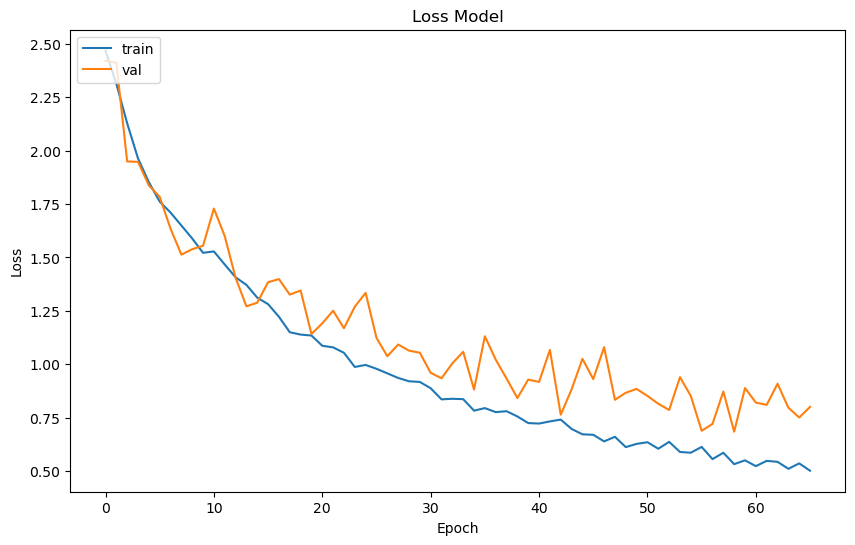

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

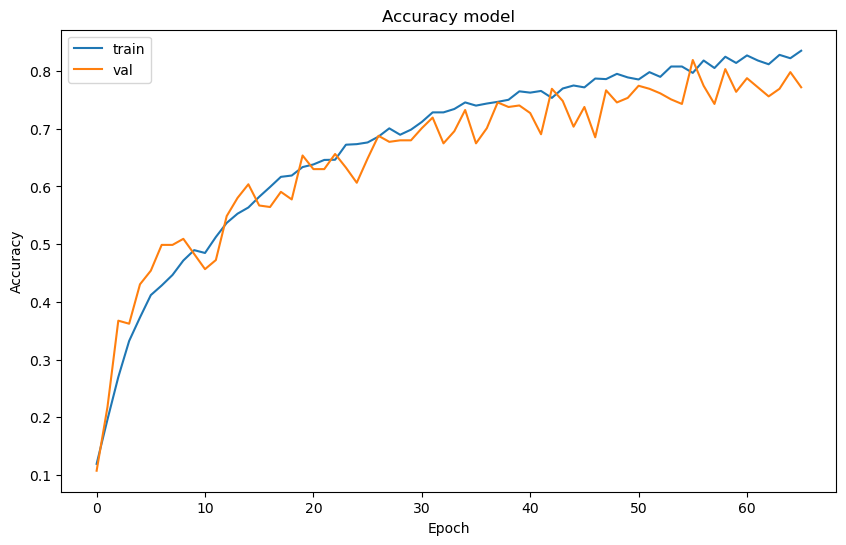

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Mencoba Model

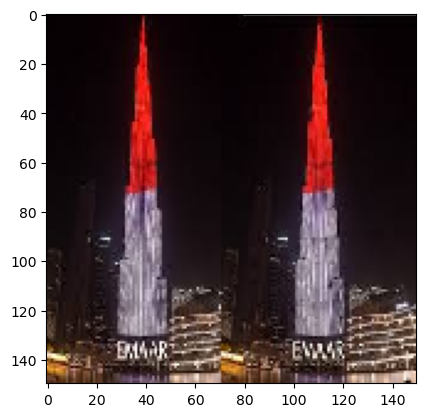

1/1 [==============================] - 0s 23ms/step
classes [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Burj Khalifa


In [19]:
import numpy as np
import tensorflow.keras.utils as image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = 'test_gambar/burj2.jpeg' # ini rock
img = image.load_img(path, target_size=(150,150))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

print('classes', classes)
if classes[0,0]:
    print('Burj Khalifa')
elif classes[0,1]:
    print('Chichen Itza')
elif classes[0,2]:
    print('Christ The Redeemer')
elif classes[0,3]:
    print('Eiffel Tower')
elif classes[0,4]:
    print('Great Wall of China')
elif classes[0,5]:
    print('Machu Pichu')
elif classes[0,6]:
    print('Pyramids of Giza')
elif classes[0,7]:
    print('Roman Colosseum')
elif classes[0,8]:
    print('Statue Of Liberty')
elif classes[0,9]:
    print('Stonehenge')
elif classes[0,10]:
    print('Taj Mahal')
elif classes[0,11]:
    print('Venezuela Angel Falls')